In [1]:
import mne
import numpy as np
import glob
from past.builtins import unicode

In [2]:
#读取SE数据
data_dir_file=r"../第四批病人数据/第四批_SE/"
data_file_path=sorted(glob.glob(data_dir_file+"*"))
# data_file_path
print(len(data_file_path))

92


In [3]:
y_train=[]
for i in data_file_path:
    if i.find('未发作')==-1:
        y_train.append(0)
    else:
        y_train.append(1)
print(len(y_train))

92


In [4]:
#由于每16s数据截成8段2s，所以y也要变成8*17倍长度
y_long_data=[]
for i in y_train:
    for j in range(8*17):
        y_long_data.append(i)
y_train=y_long_data
print(len(y_long_data))

12512


In [5]:
# 计算皮尔逊相关系数
def pearson_r(y_true, y_pred):
    x = y_true
    y = y_pred
    mx = K.mean(x, axis=0)
    my = K.mean(y, axis=0)
    xm, ym = x - mx, y - my
    r_num = K.sum(xm * ym)
    x_square_sum = K.sum(xm * xm)
    y_square_sum = K.sum(ym * ym)
    r_den = K.sqrt(x_square_sum * y_square_sum)
    r = r_num / r_den
    return K.mean(r)

from keras.models import load_model
model_path = r'../病人数据处理/Gao_Novel_CNN_RNN_dan1648644882.h5'
model = load_model(model_path, custom_objects={'pearson_r': pearson_r})

In [6]:
import scipy.signal
import scipy.io as scio    
channels_selected=17
samps = int(2 * 256)

In [7]:
x_train=[]
for i in data_file_path:
    raw = mne.io.read_raw_fif(i)
    for j in range(0,16,2):
        raw.copy().crop(tmin=j,tmax=j+2)
        data,time=raw[:]
        #重采样       
        data_after_resample=[]    
        for k in range (channels_selected):
            data_temp=scipy.signal.resample(data[k],samps)
            data_after_resample.append(data_temp)
        data_after_resample=np.array(data_after_resample)
        
        #标准化
        data_std=[]
        for k in range(channels_selected):
            tmp_mean = np.mean(data_after_resample[k])
            tmp_std = np.std(data_after_resample[k])
            data_temp_std = (data_after_resample[k] - tmp_mean) / tmp_std
            data_std.append(data_temp_std)
        data_std=np.array(data_std)
        data_std=data_std.reshape(-1,512,1)
        #高博模型过滤
        data_filt=model.predict(data_std, verbose=0) #过滤后的数据
        #分通道写入x_train
        for k in range(channels_selected):
            x_train.append(data_filt[k])

Opening raw data file ../第四批病人数据/第四批_SE\Z何富桂20220221.fif...
Isotrak not found
    Range : 8919 ... 25303 =      8.710 ...    24.710 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z何富桂20220221.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z何富桂20220225.fif...
Isotrak not found
    Range : 233098 ... 249482 =    227.635 ...   243.635 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z何富桂20220225.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z何富桂20220228.fif...
Isotrak not found
    Range : 10580 ... 26964 =     10.332 ...    26.332 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z何富桂20220228.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z何富桂20220302.fif...
Isotrak not found
    Range : 133777 ... 150161 =    130.642 ...   146.642 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z何富桂20220302.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z倪诗瑄202203011.fif...
Isotrak not found
    Range : 2646 ... 19030 =      2.584 ...    18.584 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z倪诗瑄202203011.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z倪诗瑄202203014.fif...
Isotrak not found
    Range : 112910 ... 129294 =    110.264 ...   126.264 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z倪诗瑄202203014.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z倪诗瑄202203016.fif...
Isotrak not found
    Range : 132169 ... 148553 =    129.071 ...   145.071 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z倪诗瑄202203016.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z倪诗瑄202203018.fif...
Isotrak not found
    Range : 29274 ... 45658 =     28.588 ...    44.588 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z倪诗瑄202203018.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z刘世清202203011.fif...
Isotrak not found
    Range : 39018 ... 55402 =     38.104 ...    54.104 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z刘世清202203011.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z刘世清202203014（未发作）.fif...
Isotrak not found
    Range : 571218 ... 587602 =    557.830 ...   573.830 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z刘世清202203014（未发作）.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z刘世清202203016.fif...
Isotrak not found
    Range : 46144 ... 62528 =     45.062 ...    61.062 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z刘世清202203016.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z刘世清20220309.fif...
Isotrak not found
    Range : 72862 ... 89246 =     71.154 ...    87.154 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z刘世清20220309.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z刘家瑞20220225.fif...
Isotrak not found
    Range : 167605 ... 183989 =    163.677 ...   179.677 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z刘家瑞20220225.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z刘家瑞20220228.fif...
Isotrak not found
    Range : 112416 ... 128800 =    109.781 ...   125.781 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z刘家瑞20220228.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z刘家瑞20220302.fif...
Isotrak not found
    Range : 46358 ... 62742 =     45.271 ...    61.271 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z刘家瑞20220302.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z周小凯202203014.fif...
Isotrak not found
    Range : 147821 ... 164205 =    144.356 ...   160.356 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z周小凯202203014.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z周小凯202203016.fif...
Isotrak not found
    Range : 101451 ... 117835 =     99.073 ...   115.073 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z周小凯202203016.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z周小凯202203018.fif...
Isotrak not found
    Range : 995 ... 17379 =      0.972 ...    16.972 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z周小凯202203018.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z周小凯202203021.fif...
Isotrak not found
    Range : 61765 ... 78149 =     60.317 ...    76.317 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z周小凯202203021.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z孙彭辉20220225.fif...
Isotrak not found
    Range : 39640 ... 56024 =     38.711 ...    54.711 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z孙彭辉20220225.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z孙彭辉20220228.fif...
Isotrak not found
    Range : 106204 ... 122588 =    103.715 ...   119.715 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z孙彭辉20220228.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z孙彭辉20220302.fif...
Isotrak not found
    Range : 54366 ... 70750 =     53.092 ...    69.092 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z孙彭辉20220302.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z孙彭辉20220304.fif...
Isotrak not found
    Range : 12352 ... 28736 =     12.062 ...    28.062 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z孙彭辉20220304.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z宋志辉202203018.fif...
Isotrak not found
    Range : 1938945 ... 1955329 =   1893.501 ...  1909.501 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z宋志辉202203018.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z宋志辉202203021.fif...
Isotrak not found
    Range : 45152 ... 61536 =     44.094 ...    60.094 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z宋志辉202203021.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z宋志辉202203023.fif...
Isotrak not found
    Range : 114314 ... 130698 =    111.635 ...   127.635 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z宋志辉202203023.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z宋志辉202203025.fif...
Isotrak not found
    Range : 30885 ... 47269 =     30.161 ...    46.161 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z宋志辉202203025.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z张璐20220225.fif...
Isotrak not found
    Range : 25166 ... 41550 =     24.576 ...    40.576 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z张璐20220225.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z张璐20220228.fif...
Isotrak not found
    Range : 189771 ... 206155 =    185.323 ...   201.323 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z张璐20220228.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z张璐20220302.fif...
Isotrak not found
    Range : 22362 ... 38746 =     21.838 ...    37.838 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z张璐20220302.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z徐珍英20220218（未发作）.fif...
Isotrak not found
    Range : 222292 ... 238676 =    217.082 ...   233.082 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z徐珍英20220218（未发作）.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z徐珍英20220221（未发作）.fif...
Isotrak not found
    Range : 63336 ... 79720 =     61.852 ...    77.852 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z徐珍英20220221（未发作）.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z徐珍英20220223.fif...
Isotrak not found
    Range : 181813 ... 198197 =    177.552 ...   193.552 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z徐珍英20220223.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z徐珍英20220225.fif...
Isotrak not found
    Range : 23786 ... 40170 =     23.229 ...    39.229 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z徐珍英20220225.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z曾刚20220216.fif...
Isotrak not found
    Range : 38680 ... 55064 =     37.773 ...    53.773 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z曾刚20220216.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z曾刚20220218（未发作）.fif...
Isotrak not found
    Range : 219924 ... 236308 =    214.770 ...   230.770 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z曾刚20220218（未发作）.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z曾刚20220221.fif...
Isotrak not found
    Range : 17807 ... 34191 =     17.390 ...    33.390 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z曾刚20220221.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z曾刚20220223.fif...
Isotrak not found
    Range : 70270 ... 86654 =     68.623 ...    84.623 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z曾刚20220223.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z李玉萍20220216.fif...
Isotrak not found
    Range : 50628 ... 67012 =     49.441 ...    65.441 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z李玉萍20220216.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z李玉萍20220218.fif...
Isotrak not found
    Range : 55675 ... 72059 =     54.370 ...    70.370 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z李玉萍20220218.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z李玉萍20220221（未发作）.fif...
Isotrak not found
    Range : 37414 ... 53798 =     36.537 ...    52.537 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z李玉萍20220221（未发作）.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z李玉萍20220223.fif...
Isotrak not found
    Range : 58082 ... 74466 =     56.721 ...    72.721 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z李玉萍20220223.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z杜娇20220316.fif...
Isotrak not found
    Range : 400805 ... 417189 =    391.411 ...   407.411 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z杜娇20220316.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z杜娇20220318.fif...
Isotrak not found
    Range : 267966 ... 284350 =    261.686 ...   277.686 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z杜娇20220318.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z杜娇20220321.fif...
Isotrak not found
    Range : 49993 ... 66377 =     48.821 ...    64.821 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z杜娇20220321.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z杜娇20220325（未发作）.fif...
Isotrak not found
    Range : 92841 ... 109225 =     90.665 ...   106.665 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z杜娇20220325（未发作）.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z林儒波202203023.fif...
Isotrak not found
    Range : 467832 ... 484216 =    456.867 ...   472.867 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z林儒波202203023.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z林儒波202203025.fif...
Isotrak not found
    Range : 27199 ... 43583 =     26.562 ...    42.562 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z林儒波202203025.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z林儒波202203028（未发作）.fif...
Isotrak not found
    Range : 4054 ... 20438 =      3.959 ...    19.959 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z林儒波202203028（未发作）.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z林儒波202203030.fif...
Isotrak not found
    Range : 281289 ... 297673 =    274.696 ...   290.696 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z林儒波202203030.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z林攀攀20220223（未发作）.fif...
Isotrak not found
    Range : 83008 ... 99392 =     81.062 ...    97.062 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z林攀攀20220223（未发作）.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z林攀攀20220225（未发作）.fif...
Isotrak not found
    Range : 13771 ... 30155 =     13.448 ...    29.448 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z林攀攀20220225（未发作）.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z林攀攀20220228.fif...
Isotrak not found
    Range : 38073 ... 54457 =     37.181 ...    53.181 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z林攀攀20220228.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z沈伟202203011.fif...
Isotrak not found
    Range : 331231 ... 347615 =    323.468 ...   339.468 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z沈伟202203011.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z沈伟202203014（未发作）.fif...
Isotrak not found
    Range : 51179 ... 67563 =     49.979 ...    65.979 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z沈伟202203014（未发作）.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z沈伟202203016.fif...
Isotrak not found
    Range : 156928 ... 173312 =    153.250 ...   169.250 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z沈伟202203016.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z沈伟202203018.fif...
Isotrak not found
    Range : 50914 ... 67298 =     49.721 ...    65.721 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z沈伟202203018.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z王宜凡202203018.fif...
Isotrak not found
    Range : 118132 ... 134516 =    115.363 ...   131.363 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z王宜凡202203018.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z王宜凡202203021.fif...
Isotrak not found
    Range : 67221 ... 83605 =     65.646 ...    81.646 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z王宜凡202203021.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z王宜凡202203023.fif...
Isotrak not found
    Range : 103436 ... 119820 =    101.012 ...   117.012 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z王宜凡202203023.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z王宜凡202203025.fif...
Isotrak not found
    Range : 75082 ... 91466 =     73.322 ...    89.322 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z王宜凡202203025.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z王纯刚202203021.fif...
Isotrak not found
    Range : 93782 ... 110166 =     91.584 ...   107.584 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z王纯刚202203021.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z王纯刚202203023.fif...
Isotrak not found
    Range : 69018 ... 85402 =     67.400 ...    83.400 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z王纯刚202203023.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z王纯刚202203025.fif...
Isotrak not found
    Range : 24319 ... 40703 =     23.749 ...    39.749 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z王纯刚202203025.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z王纯刚202203028.fif...
Isotrak not found
    Range : 289606 ... 305990 =    282.818 ...   298.818 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z王纯刚202203028.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z肖星星202203025.fif...
Isotrak not found
    Range : 385800 ... 402184 =    376.758 ...   392.758 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z肖星星202203025.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z肖星星202203028.fif...
Isotrak not found
    Range : 72393 ... 88777 =     70.696 ...    86.696 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z肖星星202203028.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z肖星星202203030（未发作）.fif...
Isotrak not found
    Range : 19135 ... 35519 =     18.687 ...    34.687 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z肖星星202203030（未发作）.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z肖星星20220401.fif...
Isotrak not found
    Range : 84137 ... 100521 =     82.165 ...    98.165 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z肖星星20220401.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z肖智华20220225（未发作）.fif...
Isotrak not found
    Range : 3029 ... 19413 =      2.958 ...    18.958 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z肖智华20220225（未发作）.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z肖智华20220228.fif...
Isotrak not found
    Range : 25279 ... 41663 =     24.687 ...    40.687 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z肖智华20220228.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z肖智华20220302.fif...
Isotrak not found
    Range : 617238 ... 633622 =    602.771 ...   618.771 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z肖智华20220302.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z赵丽兰20220225.fif...
Isotrak not found
    Range : 4874 ... 21258 =      4.760 ...    20.760 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z赵丽兰20220225.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z赵丽兰20220228.fif...
Isotrak not found
    Range : 25224 ... 41608 =     24.633 ...    40.633 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z赵丽兰20220228.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z赵丽兰20220302.fif...
Isotrak not found
    Range : 4442 ... 20826 =      4.338 ...    20.338 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z赵丽兰20220302.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z赵丽兰20220304.fif...
Isotrak not found
    Range : 2779 ... 19163 =      2.714 ...    18.714 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z赵丽兰20220304.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z雷振20220321.fif...
Isotrak not found
    Range : 65290 ... 81674 =     63.760 ...    79.760 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z雷振20220321.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z雷振20220323.fif...
Isotrak not found
    Range : 203788 ... 220172 =    199.012 ...   215.012 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z雷振20220323.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z雷振20220325.fif...
Isotrak not found
    Range : 45887 ... 62271 =     44.812 ...    60.812 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z雷振20220325.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z雷振20220328.fif...
Isotrak not found
    Range : 6400 ... 22784 =      6.250 ...    22.250 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z雷振20220328.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z黄盈雪20220314.fif...
Isotrak not found
    Range : 20114 ... 36498 =     19.643 ...    35.643 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z黄盈雪20220314.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z黄盈雪20220316.fif...
Isotrak not found
    Range : 90303 ... 106687 =     88.187 ...   104.187 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z黄盈雪20220316.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z黄盈雪20220318.fif...
Isotrak not found
    Range : 499 ... 16883 =      0.487 ...    16.487 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z黄盈雪20220318.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z黄盈雪20220323.fif...
Isotrak not found
    Range : 116586 ... 132970 =    113.854 ...   129.854 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z黄盈雪20220323.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z黄金燕20220309.fif...
Isotrak not found
    Range : 27979 ... 44363 =     27.323 ...    43.323 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z黄金燕20220309.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z黄金燕20220311.fif...
Isotrak not found
    Range : 75866 ... 92250 =     74.088 ...    90.088 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z黄金燕20220311.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z黄金燕20220314.fif...
Isotrak not found
    Range : 42873 ... 59257 =     41.868 ...    57.868 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z黄金燕20220314.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z黄金燕20220316.fif...
Isotrak not found
    Range : 69652 ... 86036 =     68.020 ...    84.020 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z黄金燕20220316.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z齐金钢20220223.fif...
Isotrak not found
    Range : 15380 ... 31764 =     15.020 ...    31.020 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z齐金钢20220223.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z齐金钢20220225.fif...
Isotrak not found
    Range : 8174 ... 24558 =      7.982 ...    23.982 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z齐金钢20220225.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z齐金钢20220228.fif...
Isotrak not found
    Range : 20991 ... 37375 =     20.499 ...    36.499 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z齐金钢20220228.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../第四批病人数据/第四批_SE\Z齐金钢20220302.fif...
Isotrak not found
    Range : 150366 ... 166750 =    146.842 ...   162.842 secs
Ready.


<ipython-input-7-b044a54e14bd>:3: RuntimeWarning: This filename (../第四批病人数据/第四批_SE\Z齐金钢20220302.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


In [8]:
len(x_train) #17*92*8=12512

12512

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten,Concatenate
from tensorflow.keras.layers import Conv1D, MaxPooling1D

In [10]:
#input1->conv1->pool1->conv2->pool2->conv3->pool3->flatten->dense1->dense2->concatenate->dense3->out
input1=tf.keras.layers.Input(shape=(512,1))#单通道2s数据
# input2=tf.keras.layers.Input(shape=(2,))#刺激参数
conv1=tf.keras.layers.Conv1D(64,5,padding='same',activation='relu')(input1)
pool1=tf.keras.layers.AveragePooling1D(pool_size=2,strides=2,padding='same')(conv1)#64*256
conv2=tf.keras.layers.Conv1D(32,5,padding='same',activation='relu')(pool1)
pool2=tf.keras.layers.AveragePooling1D(pool_size=2,strides=2,padding='same')(conv2)#32*128
conv3=tf.keras.layers.Conv1D(16,3,padding='same',activation='relu')(pool2)
pool3=tf.keras.layers.AveragePooling1D(pool_size=2,strides=2,padding='same')(conv3)#16*64
flatten1=tf.keras.layers.Flatten()(pool3)
dense1=tf.keras.layers.Dense(256,activation='relu')(flatten1)
dense2=tf.keras.layers.Dense(64,activation='relu')(dense1)
# concatenate1=tf.keras.layers.Concatenate()([dense2,input2])
# dense3=tf.keras.layers.Dense(20,activation='sigmoid')(concatenate1)
dense3 = tf.keras.layers.Dense(20,activation='relu')(dense2)
out=tf.keras.layers.Dense(1,activation='sigmoid')(dense3)

model=tf.keras.models.Model(inputs=input1,outputs=out)
# model=tf.keras.models.Model(inputs=[input1,input2],outputs=out)

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 512, 1)]          0         
                                                                 
 conv1d (Conv1D)             (None, 512, 64)           384       
                                                                 
 average_pooling1d (AverageP  (None, 256, 64)          0         
 ooling1D)                                                       
                                                                 
 conv1d_1 (Conv1D)           (None, 256, 32)           10272     
                                                                 
 average_pooling1d_1 (Averag  (None, 128, 32)          0         
 ePooling1D)                                                     
                                                                 
 conv1d_2 (Conv1D)           (None, 128, 16)           1552  

In [12]:
adam = tf.keras.optimizers.Adam(lr=0.001)
model.compile(loss='mse',  # 损失均方误差
              optimizer=adam,  # 优化器
              metrics='accuracy'
             )

F:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [13]:
x_train=np.array(x_train)
y_train=np.array(y_train)#方便实用validation_split

In [14]:
history = model.fit(x_train, y_train, 
                    batch_size = 8,epochs = 20,verbose = 1,
                    # validation_split = 0.2  # 训练集的20%用作验证集
                   )

Epoch 1/16
1564/1564 [==============================] - 10s 6ms/step - loss: 0.1091 - accuracy: 0.8719
Epoch 2/16
1564/1564 [==============================] - 9s 6ms/step - loss: 0.0788 - accuracy: 0.9031
Epoch 3/16
1564/1564 [==============================] - 9s 6ms/step - loss: 0.0506 - accuracy: 0.9391
Epoch 4/16
1564/1564 [==============================] - 9s 6ms/step - loss: 0.0361 - accuracy: 0.9575
Epoch 5/16
1564/1564 [==============================] - 9s 6ms/step - loss: 0.0281 - accuracy: 0.9670
Epoch 6/16
1564/1564 [==============================] - 9s 6ms/step - loss: 0.0205 - accuracy: 0.9762
Epoch 7/16
1564/1564 [==============================] - 9s 6ms/step - loss: 0.0180 - accuracy: 0.9796
Epoch 8/16
1564/1564 [==============================] - 9s 6ms/step - loss: 0.0172 - accuracy: 0.9801
Epoch 9/16
1564/1564 [==============================] - 9s 6ms/step - loss: 0.0135 - accuracy: 0.9849
Epoch 10/16
1564/1564 [==============================] - 9s 6ms/step - loss: 0.01

In [19]:
loss,acc_ = model.evaluate(x_train,y_train)

391/391 [==============================] - 2s 6ms/step - loss: 0.0090 - accuracy: 0.9910


In [16]:
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(1, len(acc) + 1)

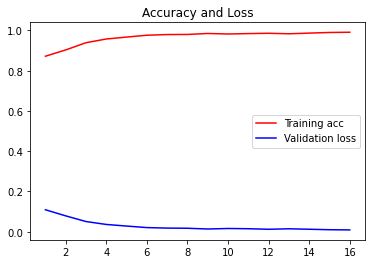

In [17]:
import matplotlib.pyplot as plt
plt.title('Accuracy and Loss')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, loss, 'blue', label='Validation loss')
plt.legend()
plt.show()

In [22]:
model.save(model.name + "_" + str(acc_) + "_.h5")